# Cities & Weather

This activity provides practice making API calls iteratively.

## Instructions

For this exercise, either work with `cities.csv` as provided, or add a few cities of your own. If you finish the main challenge and feel ambitious, try using a subset of [CountriesToCities.json](https://github.com/David-Haim/CountriesToCitiesJSON) for this activity.

* Load your `cities.csv` file, and use it to create a list of city names you can search for.

* Request weather information on each city, and store each response in a list.

* Collect longitude and atmospheric pressure data for each city. Use the API documentation to determine which keys to extract.

* Put this data into a dict, and load that dict into a Pandas DataFrame.

* Use matplotlib to create a scatter plot of pressures vs longitudes.

In [92]:
import requests as r
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_key = '&APPID=0c715aff73757bce5f32aba6da14fd45'
units = '&units=imperial'
url = 'http://api.openweathermap.org/data/2.5/weather?q='

In [26]:
cities = ['los angeles', 'paris', 'avignon', 'amsterdam', 'rome', 'new york', 'las vegas']
clean_cities = [name.replace(' ', '+') for name in cities]

In [25]:
query_url_list = [url + city + '&' + units + api_key for city in clean_cities]

In [75]:
query_url_list

['http://api.openweathermap.org/data/2.5/weather?q=los+angeles&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45',
 'http://api.openweathermap.org/data/2.5/weather?q=paris&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45',
 'http://api.openweathermap.org/data/2.5/weather?q=avignon&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45',
 'http://api.openweathermap.org/data/2.5/weather?q=amsterdam&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45',
 'http://api.openweathermap.org/data/2.5/weather?q=rome&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45',
 'http://api.openweathermap.org/data/2.5/weather?q=new+york&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45',
 'http://api.openweathermap.org/data/2.5/weather?q=las+vegas&&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45']

In [77]:
name_list = []
pressure_list = []
lat_list = []
lon_list = []
temp_list = []
for url in query_url_list:
    response_data = r.get(url).json()
    name_list.append(response_data['name'])
    pressure_list.append(response_data['main']['pressure'])
    lat_list.append(response_data['coord']['lat'])
    lon_list.append(response_data['coord']['lon'])
    temp_list.append(response_data['main']['temp'])

In [84]:
data_dict = {'city_name': name_list, 'pressure': pressure_list, 'lat': lat_list, 'lon': lon_list, 'temp': temp_list}

In [85]:
df = pd.DataFrame(data_dict)
df

,city_name,lat,lon,pressure,temp
0,Los Angeles,34.05,-118.24,1018,56.77
1,Paris,48.85,2.35,1023,43.57
2,Avignon,43.95,4.82,1026,37.72
3,Amsterdam,52.37,4.89,1020,45.21
4,Rome,34.26,-85.16,1022,44.08
5,New York,40.71,-74.01,1022,33.64
6,Las Vegas,36.17,-115.14,1022,46.40


In [88]:
lon = df['lon'].tolist()
temp = df['temp'].tolist()

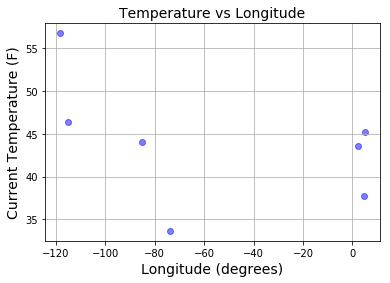

In [100]:
plt.scatter(lon, temp, color='b', alpha = 0.5)
plt.xlabel('Longitude (degrees)', fontsize = 14)
plt.ylabel('Current Temperature (F)', fontsize = 14)
plt.title('Temperature vs Longitude', fontsize = 14)
plt.grid(True)
plt.show()

In [5]:
query_url = url + clean_cities[0] + '&' + units + api_key

In [6]:
response = r.get(query_url)
response_data = response.json()
response_data 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.05, 'lon': -118.24},
 'dt': 1513576680,
 'id': 5368361,
 'main': {'humidity': 32,
  'pressure': 1017,
  'temp': 57.43,
  'temp_max': 62.6,
  'temp_min': 51.8},
 'name': 'Los Angeles',
 'sys': {'country': 'US',
  'id': 416,
  'message': 0.0046,
  'sunrise': 1513608798,
  'sunset': 1513644394,
  'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
   'icon': '01n',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'deg': 14.0049, 'speed': 2.37}}

In [7]:
temp = response_data['main']['temp']

In [8]:
lat = response_data['coord']['lat']
lon = response_data['coord']['lon']

In [9]:
pressure = response_data['main']['pressure']

In [10]:
name = response_data['name']